In [1]:
#Importing the essential libraries
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#The Natural Language Toolkit
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
seed_urls = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

In [3]:
def build_dataset(seed_urls):
    news_data = []
    for url in seed_urls:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        
        news_articles = [{'news_headline': headline.find('span', 
                                                         attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', 
                                                       attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', 
                                               class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', 
                                               class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles)
        
    df =  pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df

In [4]:
news_df = build_dataset(seed_urls)
news_df

,news_headline,news_article,news_category
0,Feel bad about inviting my mother to visit Inf...,Infosys Founder NR Narayana Murthy revealed th...,technology
1,You can film a 'Walking Dead' episode unedited...,World's second-richest person Elon Musk said t...,technology
2,ISRO successfully tests autonomous landing of ...,The Indian Space Research Organisation (ISRO) ...,technology
3,First mobile phone call was made 50 years ago ...,"American engineer Martin Cooper, widely known ...",technology
4,Haryana man held for selling data of 70 cr peo...,Cyberabad Police have arrested a Haryana man f...,technology
...,...,...,...
70,Pope Francis returns to work a day after hospi...,Pope Francis returned to official duties a day...,world
71,Thousands protest in Israel over judicial over...,A video showing thousands of Israelis protesti...,world
72,7 dead as massive storms strike several US sta...,At least seven people have reportedly died aft...,world
73,Ukraine has nuclear goals: N Korean leader Kim...,"Kim Yo Jong, who is the sister of North Korean...",world


In [5]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [6]:
from datasets import load_dataset
datasets = load_dataset('multi_news')
print(datasets)

Found cached dataset multi_news (C:/Users/Admin/.cache/huggingface/datasets/multi_news/default/1.0.0/2f1f69a2bedc8ad1c5d8ae5148e4755ee7095f465c1c01ae8f85454342065a72)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['document', 'summary'],
        num_rows: 44972
    })
    validation: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
    test: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
})


In [7]:
datasets

DatasetDict({
    train: Dataset({
        features: ['document', 'summary'],
        num_rows: 44972
    })
    validation: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
    test: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
})

In [8]:
print(f"Features: {datasets['train'].column_names}")

Features: ['document', 'summary']


In [9]:
sample = datasets["train"][1]
print(f"""Document (excerpt of 2000 characters, total length: {len(sample["document"])}):""")
print(sample["document"][:2000])
print(f'\nSummary (length: {len(sample["summary"])}):')
print(sample["summary"])

Document (excerpt of 2000 characters, total length: 5353):
LOS ANGELES (AP) — In her first interview since the NBA banned her estranged husband, Shelly Sterling says she will fight to keep her share of the Los Angeles Clippers and plans one day to divorce Donald Sterling. 
 
 (Click Prev or Next to continue viewing images.) 
 
 ADVERTISEMENT (Click Prev or Next to continue viewing images.) 
 
 Los Angeles Clippers co-owner Shelly Sterling, below, watches the Clippers play the Oklahoma City Thunder along with her attorney, Pierce O'Donnell, in the first half of Game 3 of the Western Conference... (Associated Press) 
 
 Shelly Sterling spoke to Barbara Walters, and ABC News posted a short story with excerpts from the conversation Sunday. 
 
 NBA Commissioner Adam Silver has banned Donald Sterling for making racist comments and urged owners to force Sterling to sell the team. Silver added that no decisions had been made about the rest of Sterling's family. 
 
 According to ABC's story, Sh

In [10]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [11]:
#just to check
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.9708, 0.3001, 0.6375],
        [0.1979, 0.1873, 0.8440],
        [0.2944, 0.0776, 0.0990],
        [0.9178, 0.8415, 0.2040],
        [0.0657, 0.9386, 0.1385]])


In [12]:
#Using BART for summarization
from transformers import BartForConditionalGeneration, AutoTokenizer
model_ckpt = "sshleifer/distilbart-cnn-6-6"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = BartForConditionalGeneration.from_pretrained(model_ckpt)

In [13]:
#Fine-Tuning BART
d_len = [len(tokenizer.encode(s)) for s in datasets["validation"]["document"]]
s_len = [len(tokenizer.encode(s)) for s in datasets["validation"]["summary"]]

Token indices sequence length is longer than the specified maximum sequence length for this model (2331 > 1024). Running this sequence through the model will result in indexing errors


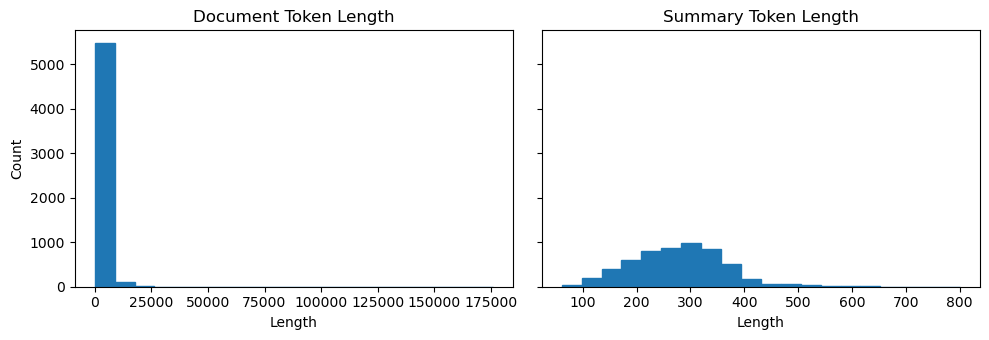

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
axes[0].hist(d_len, bins=20, color="C0", edgecolor="C0")
axes[0].set_title("Document Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")
axes[1].hist(s_len, bins=20, color="C0", edgecolor="C0")
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()

In [15]:
def convert_examples_to_features(example_batch):
    input_encodings = tokenizer(example_batch["document"], max_length=1024, truncation=True)
    
    with tokenizer.as_target_tokenizer():
        target_encodings = tokenizer(example_batch["summary"], max_length=256, truncation=True)
        
    return {"input_ids": input_encodings["input_ids"], 
           "attention_mask": input_encodings["attention_mask"], 
           "labels": target_encodings["input_ids"]}
dataset_pt = datasets.map(convert_examples_to_features, batched=True)

Loading cached processed dataset at C:\Users\Admin\.cache\huggingface\datasets\multi_news\default\1.0.0\2f1f69a2bedc8ad1c5d8ae5148e4755ee7095f465c1c01ae8f85454342065a72\cache-4d9383b89a703e80.arrow
Loading cached processed dataset at C:\Users\Admin\.cache\huggingface\datasets\multi_news\default\1.0.0\2f1f69a2bedc8ad1c5d8ae5148e4755ee7095f465c1c01ae8f85454342065a72\cache-0cb0792bd12db974.arrow


Map:   0%|          | 0/5622 [00:00<?, ? examples/s]

C:\Users\Admin\anaconda31\lib\site-packages\transformers\tokenization_utils_base.py:3546: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [16]:
from transformers import DataCollatorForSeq2Seq
seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [17]:
from transformers import TrainingArguments, Trainer
training_args = TrainingArguments(output_dir='bart-multi-news', num_train_epochs=1, warmup_steps=500,                                  per_device_train_batch_size=1, per_device_eval_batch_size=1, weight_decay=0.01, logging_steps=10, push_to_hub=False, 
evaluation_strategy='steps', eval_steps=500, save_steps=1e6, 
gradient_accumulation_steps=16)

In [18]:
trainer = Trainer(model=model, args=training_args, tokenizer=tokenizer, data_collator=seq2seq_data_collator, train_dataset=dataset_pt["train"],eval_dataset=dataset_pt["validation"])
trainer.train()

The following columns in the training set don't have a corresponding argument in `BartForConditionalGeneration.forward` and have been ignored: document, summary. If document, summary are not expected by `BartForConditionalGeneration.forward`,  you can safely ignore this message.
C:\Users\Admin\anaconda31\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 44972
  Num Epochs = 1
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 16
  Total optimization steps = 2810
  Number of trainable parameters = 229933056
You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` metho

Step,Training Loss,Validation Loss
500,2.660400,2.572480
1000,2.650700,2.483058
1500,2.599700,2.445455
2000,2.474900,2.419706
2500,2.484600,2.412487


The following columns in the evaluation set don't have a corresponding argument in `BartForConditionalGeneration.forward` and have been ignored: document, summary. If document, summary are not expected by `BartForConditionalGeneration.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5622
  Batch size = 1
The following columns in the evaluation set don't have a corresponding argument in `BartForConditionalGeneration.forward` and have been ignored: document, summary. If document, summary are not expected by `BartForConditionalGeneration.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 5622
  Batch size = 1
The following columns in the evaluation set don't have a corresponding argument in `BartForConditionalGeneration.forward` and have been ignored: document, summary. If document, summary are not expected by `BartForConditionalGeneration.forward`,  you can safely ignore this message.
***** Running 

TrainOutput(global_step=2810, training_loss=2.5858149321478034, metrics={'train_runtime': 313776.0493, 'train_samples_per_second': 0.143, 'train_steps_per_second': 0.009, 'total_flos': 4.541187731292979e+16, 'train_loss': 2.5858149321478034, 'epoch': 1.0})

In [20]:

#Generating Multi-Document Summaries
sample_text = datasets["test"][1]["document"]
reference = datasets["test"][1]["summary"]
print("Document:")
print(sample_text)
print("\nReference Summary:")
print(reference)

Document:

 
 
 
 UPDATE: 4/19/2001 Read Richard Metzger: How I, a married, middle-aged man, became an accidental spokesperson for gay rights overnight on Boing Boing 
 
 It’s time to clarify a few details about the controversial “Hey Facebook what’s SO wrong with a pic of two men kissing?” story, as it now beginning to be reported in the mainstream media, and not always correctly. 
 
 First of all, with regards to the picture: 
 
 The photo which was used to illustrate my first post about the John Snow Kiss-In is a promotional still from the British soap opera “Eastenders.” It features one of the main characters from the show (Christian Clarke, played by the actor John Partridge- left) and someone else who I don’t know. I am not a regular viewer so I can’t say if the man on the right is an extra or an actual character. 
 
 This picture has itself caused scandal in the UK, as it was a gay kiss that was broadcast before the watershed, and as such led to a number of complaints to the BBC

In [23]:
input_ids = tokenizer(sample_text, max_length=1024, truncation=True, padding='max_length', return_tensors='pt').to(device)

In [ ]:
#Extra for Decive error

In [22]:
import torch

# Check if a GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")


In [ ]:
#Extra done

In [24]:
summaries = model.generate(input_ids=input_ids['input_ids'], attention_mask=input_ids['attention_mask'],max_length=256)

In [25]:
decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True, clean_up_tokenization_spaces=True) for s in summaries]

In [26]:
print("\nReference Summary:")
print(reference)
print("\nModel Summary:")
print(decoded_summaries[0])


Reference Summary:
– It turns out Facebook is only guilty of about half of what it’s been accused of in the gay kiss incident. The social networking site apologized yesterday for taking down an image used to promote a “kiss-in” event in London. “The photo in question does not violate our Statement of Rights and Responsibilities, and was removed in error,” the site said in a statement, according to the Advocate. But Facebook did not, as has been reported in several places, take down the kiss-in event itself. Here’s what happened: The photo Facebook took down was posted by the Dangerous Minds blog to promote the event. In its initial write-up about the incident, the blog observed that the page organizing the protest had been taken down. But it was actually the organizer himself who "removed" the event, Dangerous Minds clarified. Organizer Paul Shetler explains that he decided to switch it from a public event to a private one, as "there were starting to be trolls posting abusive nonsense

In [5]:
import tkinter as tk
from tkinter import ttk
from tkinter import scrolledtext
from tkinter import messagebox
import requests
from bs4 import BeautifulSoup
from transformers import BartForConditionalGeneration, AutoTokenizer

model_ckpt = "sshleifer/distilbart-cnn-6-6"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = BartForConditionalGeneration.from_pretrained(model_ckpt)

def summarize_news():
    # Get the URLs from the user input
    urls = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']
    
    # Build the news dataset
    news_data = []
    for url in urls:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        
        news_articles = [{'news_headline': headline.find('span', 
                                                         attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', 
                                                       attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', 
                                               class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', 
                                               class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles)
        
    # Generate the news summaries
    news_summaries = []
    for article in news_data:
        input_text = article['news_article']
        input_ids = tokenizer(input_text, max_length=1024, truncation=True, padding='max_length', return_tensors='pt')
        summary_ids = model.generate(input_ids['input_ids'].to('cuda'))
        summary_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        news_summaries.append(summary_text)
    
    # Display the news summaries in the GUI
    output_text.configure(state='normal')
    output_text.delete('1.0', 'end')
    for i in range(len(news_data)):
        output_text.insert('end', f"{i+1}. {news_data[i]['news_headline']}\n")
        output_text.insert('end', f"Category: {news_data[i]['news_category']}\n")
        output_text.insert('end', f"Summary: {news_summaries[i]}\n\n")
    output_text.configure(state='disabled')
    
# Create the GUI window
window = tk.Tk()
window.title("News Summarizer")

# Create the URL input field
url_label = ttk.Label(window, text="Enter URLs (one per line):")
url_label.grid(column=0, row=0, padx=5, pady=5)
url_input = scrolledtext.ScrolledText(window, width=50, height=5)
url_input.grid(column=0, row=1, padx=5, pady=5)

# Create the Summarize button
summarize_button = ttk.Button(window, text="Summarize", command=summarize_news)
summarize_button.grid(column=0, row=2, padx=5, pady=5)
window.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda31\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_8928\2030835156.py", line 45, in summarize_news
    summary_ids = model.generate(input_ids['input_ids'].to('cuda'))
  File "C:\Users\Admin\anaconda31\lib\site-packages\torch\cuda\__init__.py", line 239, in _lazy_init
    raise AssertionError("Torch not compiled with CUDA enabled")
AssertionError: Torch not compiled with CUDA enabled
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda31\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_8928\2030835156.py", line 45, in summarize_news
    summary_ids = model.generate(input_ids['input_ids'].to('cuda'))
  File "C:\Users\Admin\anaconda31\lib\site-packages\torch\cuda\__init__.py", line 239, in _la

In [ ]:
if _name_ == '_main_':
    app.run()

In [ ]:
import requests
import streamlit as st
from transformers import BartTokenizer, BartForConditionalGeneration

# Fetch the latest news from Inshorts API
response = requests.get('https://inshorts.com/api/news')
news = response.json()

# Select a random news article from the fetched data
article = news['data'][0]

# Extract the headline and content from the article
headline = article['title']
content = article['content']

# Summarize the content using BART tokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
input_ids = tokenizer.encode(content, return_tensors='pt')
summary_ids = model.generate(input_ids, max_length=120, num_beams=4, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Display the headline and summary in the Streamlit app
st.write('# ' + headline)
st.write(summary)
